In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/archive (8).zip')  # Replace with your actual dataset file

# Inspect the data
print(df.info())  # Check for missing values and data types
print(df.head())  # Display first few rows of the dataset
# Check for missing values




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59998 non-null  float64
 1   longitude                                    59998 non-null  float64
 2   latitude                                     59998 non-null  float64
 3   Police_Force                                 59998 non-null  float64
 4   Accident_Severity                            59998 non-null  float64
 5   Number_of_Vehicles                           59998 non-null  float64
 6   Number_of_Casualties                         59998 non-null  float64
 7   Day_of_Week                                  59998 non-null  float64
 8   Time                                         59997 non-null  object 
 9   Local_Authority_(District)                   59998 non-null  float64

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing values (you can also impute them based on the context)
df = df.dropna(subset=['longitude', 'latitude', 'Weather_Conditions', 'Road_Surface_Conditions', 'Time'])


Accident_Index                                 988577
longitude                                      988577
latitude                                       988577
Police_Force                                   988577
Accident_Severity                              988577
Number_of_Vehicles                             988577
Number_of_Casualties                           988577
Day_of_Week                                    988577
Time                                           988578
Local_Authority_(District)                     988577
Local_Authority_(Highway)                      988577
1st_Road_Class                                 988577
1st_Road_Number                                988577
Road_Type                                      988577
Speed_limit                                    988577
Junction_Detail                                988577
Junction_Control                               988577
2nd_Road_Class                                 988577
2nd_Road_Number             

In [ ]:
# Convert 'Time' column to datetime and extract the hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour


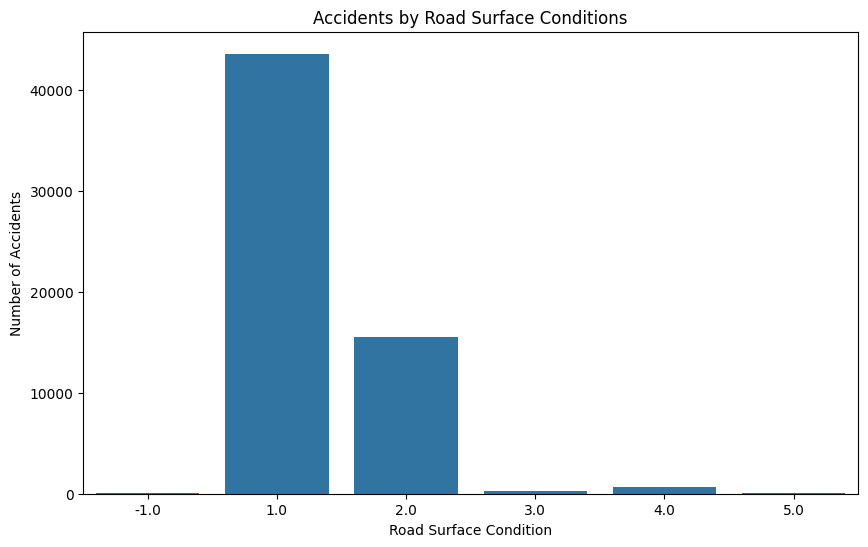

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot accidents by road surface conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Road_Surface_Conditions')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.show()


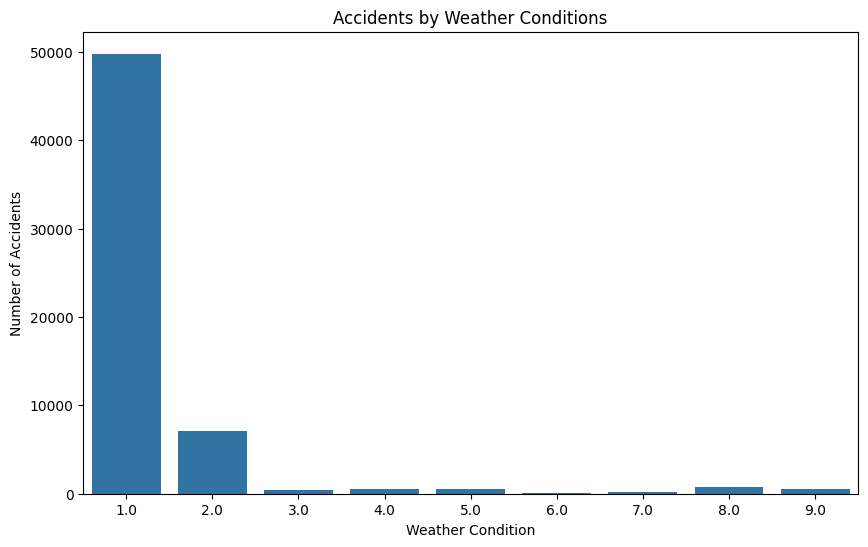

In [ ]:
# Plot accidents by weather conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Weather_Conditions')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()


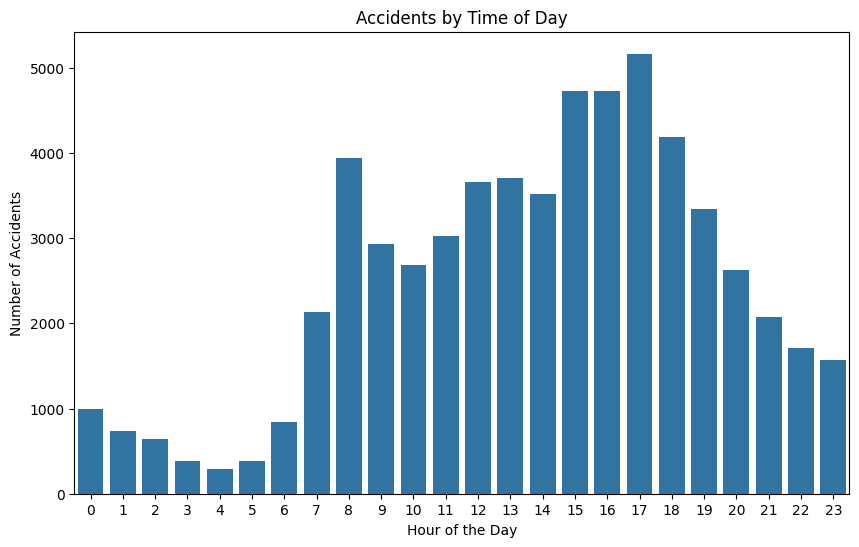

In [ ]:
# Plot accidents by hour of day
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Hour')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


In [ ]:
!pip install folium
from IPython.display import display
display(accident_map)

import folium
from folium.plugins import HeatMap

# Create a map centered around the average coordinates
accident_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Prepare data for the heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Create a heatmap layer
HeatMap(heat_data).add_to(accident_map)

# Save or display the map
accident_map.save('accident_hotspots_map.html')
